# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [ ]:
# Initial state : Một bàn cờ 6x7 rỗng với quân cờ đi trước là quân màu đỏ
def initial_state():
    board = [[' ' for _ in range(7)] for _ in range(6)]  # 6 rows × 7 columns
    player = 'R'
    return (board, player)

In [ ]:
# Action : Là hành động đặt quân cờ vào cột 7 cột sao cho cột đó chưa đầy
def actions(state):
    board, _ = state
    valid_actions = [c for c in range(7) if board[0][c] == ' ']
    return valid_actions

In [ ]:
#Transition model : Là trạng thái mà sau khi người chơi thực hiện hành động đặt quân cờ, lúc này bàn cờ sẽ thêm 1 quân và chuyển lượt cho người chơi còn lại
def result(state, action):
    board, player = state
    new_board = [row[:] for row in board]

    for row in range(5, -1, -1):
        if new_board[row][action] == ' ':
            new_board[row][action] = player
            break

    next_player = 'Y' if player == 'R' else 'R'
    return (new_board, next_player)

In [ ]:
# Goal State : Là trường hợp mà 1 trong 2 người chơi có 4 quân được đặt liên tiếp theo hàng ngang, dọc hoặc chéo. 
#              Hoặc 1 trường hợp khác là bảng được đặt đầy nhưng chưa người chơi nào thắng

def terminal_test(state):
    board, _ = state

    for player in ['R', 'Y']:
        # Kiểm tra theo hàng ngang
        for r in range(6):
            for c in range(4):
                if all(board[r][c+i] == player for i in range(4)):
                    return True, player
        # Kiểm tra theo hàng dọc
        for c in range(7):
            for r in range(3):
                if all(board[r+i][c] == player for i in range(4)):
                    return True, player
        # Kiểm tra đường chéo
        for r in range(3):
            for c in range(4):
                if all(board[r+i][c+i] == player for i in range(4)):
                    return True, player

        for r in range(3, 6):
            for c in range(4):
                if all(board[r-i][c+i] == player for i in range(4)):
                    return True, player

    # Kiểm tra có hòa hay không
    if all(board[0][c] != ' ' for c in range(7)):
        return True, 'Draw'

    return False, None


def utility(state):
    terminal, winner = terminal_test(state)
    if not terminal:
        return None
    if winner == 'R':
        return 1
    elif winner == 'Y':
        return -1
    else:
        return 0


How big is the state space? Give an estimate and explain it.

In [ ]:
# Kích thước bàn cờ là 6x7 = 42
# Mỗi vị trí có 3 trạng thái là Red, Yellow hoặc None
# Vậy state space là 3 mũ 42

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Kích thước bàn cờ là 6x7 = 42
# Mỗi người chơi đặt vào 7 cột
# Vậy kích thước là 7 mũ 42

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

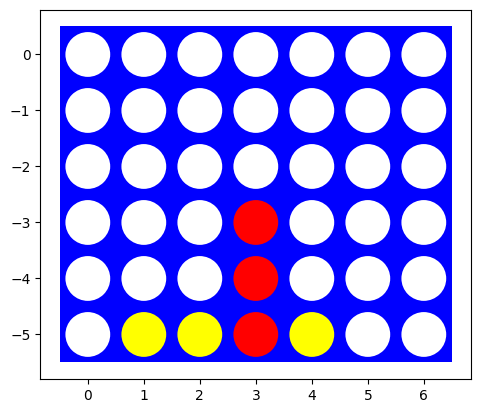

In [ ]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [27]:
import numpy as np
import random

ROWS, COLS = 6, 7

In [28]:
def actions(state):
    return [c for c in range(COLS) if 0 in state[:, c]]

In [29]:
def result(state, player, action):
    new_state = state.copy()
    for r in range(ROWS - 1, -1, -1):
        if new_state[r, action] == 0:
            new_state[r, action] = player
            break
    return new_state

In [30]:
def check_winner(state):
    # Hàng ngang
    for r in range(ROWS):
        for c in range(COLS - 3):
            line = state[r, c:c+4]
            if len(set(line)) == 1 and line[0] != 0:
                return line[0]

    # Hàng dọc
    for r in range(ROWS - 3):
        for c in range(COLS):
            line = state[r:r+4, c]
            if len(set(line)) == 1 and line[0] != 0:
                return line[0]

    # Chéo xuống
    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            line = [state[r+i, c+i] for i in range(4)]
            if len(set(line)) == 1 and line[0] != 0:
                return line[0]

    # Chéo lên
    for r in range(3, ROWS):
        for c in range(COLS - 3):
            line = [state[r-i, c+i] for i in range(4)]
            if len(set(line)) == 1 and line[0] != 0:
                return line[0]

    return 0

In [31]:
def terminal(state):
    return check_winner(state) != 0 or np.all(state != 0)

In [32]:
def utility(state, player):
    winner = check_winner(state)
    if winner == player:
        return 1
    elif winner == 3 - player:
        return -1
    return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
def random_player(board, player=1):
    valid = actions(board)
    return random.choice(valid) if valid else None

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [35]:
def play_random_games(num_games=1000):
    results = {"Player 1": 0, "Player 2": 0, "Draw": 0}
    for _ in range(num_games):
        board = np.zeros((ROWS, COLS), dtype=int)
        player = 1
        while not terminal(board):
            move = random_player(board, player)
            if move is None:
                break
            board = result(board, player, move)
            player = 3 - player
        winner = check_winner(board)
        if winner == 1:
            results["Player 1"] += 1
        elif winner == 2:
            results["Player 2"] += 1
        else:
            results["Draw"] += 1
    return results

results = play_random_games(1000)
print(results)

{'Player 1': 553, 'Player 2': 447, 'Draw': 0}


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [52]:
import numpy as np
import math
import random
import time

class ConnectFourAI:
    def __init__(self, rows=6, cols=7, max_depth=4):
        self.rows = rows
        self.cols = cols
        self.max_depth = max_depth

    def actions(self, state):
        return [c for c in range(self.cols) if 0 in state[:, c]]

    def ordered_actions(self, state):
        """Ưu tiên duyệt cột giữa trước để tăng hiệu quả alpha-beta pruning"""
        order = list(range(self.cols))
        center = self.cols // 2
        order.sort(key=lambda x: abs(x - center))  # càng gần giữa càng ưu tiên
        return [c for c in order if 0 in state[:, c]]

    def result(self, state, player, action):
        new_state = state.copy()
        for r in range(self.rows - 1, -1, -1):
            if new_state[r, action] == 0:
                new_state[r, action] = player
                break
        return new_state

    def terminal(self, state):
        return self.check_winner(state) != 0 or np.all(state != 0)

    def utility(self, state, player):
        winner = self.check_winner(state)
        if winner == player:
            return 1
        elif winner == 3 - player:
            return -1
        return 0

    def check_winner(self, state):
        rows, cols = state.shape
        for r in range(rows):
            for c in range(cols - 3):
                line = state[r, c:c+4]
                if len(set(line)) == 1 and line[0] != 0:
                    return line[0]
        for c in range(cols):
            for r in range(rows - 3):
                line = state[r:r+4, c]
                if len(set(line)) == 1 and line[0] != 0:
                    return line[0]
        for r in range(rows - 3):
            for c in range(cols - 3):
                line = [state[r+i, c+i] for i in range(4)]
                if len(set(line)) == 1 and line[0] != 0:
                    return line[0]
        for r in range(rows - 3):
            for c in range(3, cols):
                line = [state[r+i, c-i] for i in range(4)]
                if len(set(line)) == 1 and line[0] != 0:
                    return line[0]
        return 0

    def minimax(self, state, depth, alpha, beta, maximizing, player):
        if depth == 0 or self.terminal(state):
            return self.utility(state, player), None

        actions = self.ordered_actions(state)
        best_action = None

        if maximizing:
            value = -math.inf
            for action in actions:
                new_state = self.result(state, player, action)
                new_value, _ = self.minimax(new_state, depth - 1, alpha, beta, False, player)
                if new_value > value:
                    value = new_value
                    best_action = action
                alpha = max(alpha, value)
                if beta <= alpha:
                    break
            return value, best_action
        else:
            value = math.inf
            for action in actions:
                new_state = self.result(state, 3 - player, action)
                new_value, _ = self.minimax(new_state, depth - 1, alpha, beta, True, player)
                if new_value < value:
                    value = new_value
                    best_action = action
                beta = min(beta, value)
                if beta <= alpha:
                    break
            return value, best_action

In [53]:
def minimax_player(board, player=1):
    rows, cols = board.shape
    depth = 4 if rows * cols <= 16 else 3  # nhỏ thì sâu hơn
    ai = ConnectFourAI(rows=rows, cols=cols, max_depth=depth)
    _, action = ai.minimax(board, ai.max_depth, -math.inf, math.inf, True, player)
    if action is None:
        valid_actions = ai.actions(board)
        return random.choice(valid_actions)
    return action

In [54]:
def random_player(board, player=1):
    rows, cols = board.shape
    ai = ConnectFourAI(rows=rows, cols=cols)
    actions = ai.actions(board)
    return random.choice(actions) if actions else None

ai = ConnectFourAI(rows=4, cols=4, max_depth=4)
board = np.zeros((4, 4), dtype=int)
player = 1

start = time.time()

while not ai.terminal(board):
    if player == 1:
        move = minimax_player(board, player)
    else:
        move = random_player(board, player)
    if move is None:
        break
    board = ai.result(board, player, move)
    player = 3 - player

end = time.time()

print("Final board:\n", board)
winner = ai.check_winner(board)
print("Winner:", "Player 1" if winner == 1 else "Player 2" if winner == 2 else "Draw")
print(f"Thời gian chạy: {end - start:.2f} giây")

Final board:
 [[2 1 1 2]
 [1 2 1 1]
 [2 1 2 2]
 [2 2 1 1]]
Winner: Draw
Thời gian chạy: 0.17 giây


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [56]:
import numpy as np


def test_boards():
    ai = ConnectFourAI(rows=4, cols=4, max_depth=4)

    board1 = np.array([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 1, 1, 0]
    ])
    
    board2 = np.array([
        [0, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 2, 0, 0],
        [0, 2, 0, 0]
    ])
    
    board3 = np.array([
        [0, 0, 0, 0],
        [1, 2, 0, 0],
        [2, 1, 0, 0],
        [1, 2, 1, 0]
    ])
    
    board4 = np.array([
        [0, 0, 0, 0],
        [0, 1, 2, 0],
        [1, 2, 1, 0],
        [2, 1, 2, 0]
    ])
    
    board5 = np.array([
        [1, 2, 1, 2],
        [2, 1, 2, 1],
        [1, 2, 1, 2],
        [2, 1, 2, 0]
    ])

    boards = [board1, board2, board3, board4, board5]
    titles = [
        "AI sắp thắng ngang",
        "AI cần chặn dọc",
        "Trận đang giữa chừng",
        "AI có thể thắng chéo",
        "Bàn gần hòa"
    ]

    for i, board in enumerate(boards):
        print(f"\n {titles[i]}")
        print(board)
        move = minimax_player(board, player=1)
        print(f"AI chọn cột: {move}")

test_boards()


 AI sắp thắng ngang
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 0]]
AI chọn cột: 3

 AI cần chặn dọc
[[0 0 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 2 0 0]]
AI chọn cột: 1

 Trận đang giữa chừng
[[0 0 0 0]
 [1 2 0 0]
 [2 1 0 0]
 [1 2 1 0]]
AI chọn cột: 2

 AI có thể thắng chéo
[[0 0 0 0]
 [0 1 2 0]
 [1 2 1 0]
 [2 1 2 0]]
AI chọn cột: 2

 Bàn gần hòa
[[1 2 1 2]
 [2 1 2 1]
 [1 2 1 2]
 [2 1 2 0]]
AI chọn cột: 3


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [57]:
import time
import numpy as np

def measure_time(rows, cols, depth=4):
    ai = ConnectFourAI(rows=rows, cols=cols, max_depth=depth)
    board = np.zeros((rows, cols), dtype=int)
    board[-1, :3] = [1, 2, 1]  # tạo bàn có vài quân để hợp lệ

    start = time.time()
    _ = minimax_player(board, player=1)
    end = time.time()

    print(f"{rows}x{cols} board → time: {end - start:.4f} seconds")

In [58]:
measure_time(4, 4)
measure_time(5, 5)
measure_time(6, 7)

4x4 board → time: 0.0015 seconds
5x5 board → time: 0.0020 seconds
6x7 board → time: 0.0069 seconds


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [59]:
def actions(self, state):
    valid_actions = [c for c in range(self.cols) if state[0, c] == 0]
    center = self.cols // 2
    valid_actions.sort(key=lambda c: abs(center - c))
    return valid_actions

In [60]:
import time

ai_no_order = ConnectFourAI(rows=6, cols=7, max_depth=4)
ai_with_order = ConnectFourAI(rows=6, cols=7, max_depth=4)

# Tắt move ordering
ai_no_order.actions = lambda state: [c for c in range(ai_no_order.cols) if state[0, c] == 0]

# Bật move ordering
def ordered_actions(state):
    valid_actions = [c for c in range(ai_with_order.cols) if state[0, c] == 0]
    center = ai_with_order.cols // 2
    valid_actions.sort(key=lambda c: abs(center - c))
    return valid_actions
ai_with_order.actions = ordered_actions

# Tạo bàn test
board = np.zeros((6,7), dtype=int)

# Đo thời gian
start = time.time()
ai_no_order.minimax(board, ai_no_order.max_depth, -math.inf, math.inf, True, 1)
t1 = time.time() - start

start = time.time()
ai_with_order.minimax(board, ai_with_order.max_depth, -math.inf, math.inf, True, 1)
t2 = time.time() - start

print(f"Không sắp xếp: {t1:.4f}s")
print(f"Có sắp xếp: {t2:.4f}s")


Không sắp xếp: 0.0177s
Có sắp xếp: 0.0166s


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Có thể giới hạn độ sâu tìm kiếm và sử dụng hàm đánh giá heuristic thay vì duyệt toàn bộ cây trò chơi.
# Có thể áp dụng cắt tỉa alpha–beta, sắp xếp thứ tự nước đi và tìm kiếm mở rộng dần để giảm số lượng nút cần duyệt, giúp thuật toán khả thi hơn.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [61]:
def play_game():
    ai = ConnectFourAI(rows=4, cols=4, max_depth=4)
    board = np.zeros((4, 4), dtype=int)
    player = 1

    while not ai.terminal(board):
        if player == 1:
            move = minimax_player(board, player)
        else:
            move = random_player(board, player)
        if move is None:
            break
        board = ai.result(board, player, move)
        player = 3 - player

    return ai.utility(board, 1)


results = {"Minimax Wins": 0, "Random Wins": 0, "Draw": 0}

for _ in range(100):
    outcome = play_game()
    if outcome == 1:
        results["Minimax Wins"] += 1
    elif outcome == -1:
        results["Random Wins"] += 1
    else:
        results["Draw"] += 1

print(results)

{'Minimax Wins': 62, 'Random Wins': 6, 'Draw': 32}


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [81]:
import numpy as np
import time
import math
import random

# ==== Định nghĩa ConnectFourAI (có heuristic & alpha-beta) ====
class ConnectFourAI:
    def __init__(self, rows=4, cols=5, max_depth=4):
        self.rows = rows
        self.cols = cols
        self.max_depth = max_depth

    def actions(self, state):
        return [c for c in range(self.cols) if 0 in state[:, c]]

    def result(self, state, player, action):
        new_state = state.copy()
        for r in range(self.rows - 1, -1, -1):
            if new_state[r, action] == 0:
                new_state[r, action] = player
                break
        return new_state

    def check_winner(self, state):
        rows, cols = state.shape
        for r in range(rows):
            for c in range(cols - 3):
                if state[r, c] != 0 and len(set(state[r, c:c+4])) == 1:
                    return state[r, c]
        for c in range(cols):
            for r in range(rows - 3):
                if state[r, c] != 0 and len(set(state[r:r+4, c])) == 1:
                    return state[r, c]
        for r in range(rows - 3):
            for c in range(cols - 3):
                if len(set([state[r+i, c+i] for i in range(4)])) == 1 and state[r, c] != 0:
                    return state[r, c]
                if len(set([state[r+3-i, c+i] for i in range(4)])) == 1 and state[r+3, c] != 0:
                    return state[r+3, c]
        return 0

    def terminal(self, state):
        return self.check_winner(state) != 0 or np.all(state != 0)

    def evaluate_window(self, window, player):
        opponent = 2 if player == 1 else 1
        score = 0
        if list(window).count(player) == 4:
            score += 100
        elif list(window).count(player) == 3 and list(window).count(0) == 1:
            score += 10
        elif list(window).count(player) == 2 and list(window).count(0) == 2:
            score += 3
        if list(window).count(opponent) == 3 and list(window).count(0) == 1:
            score -= 12
        return score

    def evaluate(self, board, player):
        score = 0
        opponent = 2 if player == 1 else 1
        winner = self.check_winner(board)

        if winner == player:
            return 1.0
        elif winner == opponent:
            return -1.0

        for r in range(self.rows):
            for c in range(self.cols - 3):
                score += self.evaluate_window(board[r, c:c+4], player)
        for c in range(self.cols):
            for r in range(self.rows - 3):
                score += self.evaluate_window(board[r:r+4, c], player)
        for r in range(self.rows - 3):
            for c in range(self.cols - 3):
                diag1 = [board[r+i, c+i] for i in range(4)]
                diag2 = [board[r+3-i, c+i] for i in range(4)]
                score += self.evaluate_window(diag1, player)
                score += self.evaluate_window(diag2, player)

        return max(-1, min(1, score / 100.0))

    def minimax(self, state, depth, alpha, beta, maximizing, player):
        if depth == 0 or self.terminal(state):
            return self.evaluate(state, player), None

        valid_moves = self.actions(state)
        best_move = random.choice(valid_moves) if valid_moves else None

        if maximizing:
            value = -math.inf
            for move in valid_moves:
                new_state = self.result(state, player, move)
                new_value, _ = self.minimax(new_state, depth - 1, alpha, beta, False, player)
                if new_value > value:
                    value = new_value
                    best_move = move
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return value, best_move
        else:
            value = math.inf
            for move in valid_moves:
                new_state = self.result(state, 3 - player, move)
                new_value, _ = self.minimax(new_state, depth - 1, alpha, beta, True, player)
                if new_value < value:
                    value = new_value
                    best_move = move
                beta = min(beta, value)
                if alpha >= beta:
                    break
            return value, best_move


In [66]:
ai = ConnectFourAI(rows=4, cols=4)

board = np.array([
    [0, 0, 0, 0],
    [1, 2, 0, 0],
    [1, 1, 2, 0],
    [2, 1, 1, 0]
])

value = ai.evaluate(board, player=1)
print("Heuristic value (player 1):", value)


Heuristic value (player 1): 0.0


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [76]:
def minimax_player(board, player=1, depth=3):
    ai = ConnectFourAI(rows=4, cols=4, max_depth=depth)
    _, move = ai.minimax(board, depth, -math.inf, math.inf, True, player)
    return move

In [69]:
board = np.array([
    [0, 0, 0, 0],
    [1, 2, 0, 0],
    [1, 1, 2, 0],
    [2, 1, 1, 0]
])

for d in [2, 3, 4]:
    move = minimax_player(board, player=1, depth=d)
    print(f"Depth {d}: AI chọn cột {move}")


Depth 2: AI chọn cột 0
Depth 3: AI chọn cột 0
Depth 4: AI chọn cột 0


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [77]:
def test_boards():
    ai = ConnectFourAI(rows=4, cols=4, max_depth=4)

    boards = [
        np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,1,1,0]]),
        np.array([[0,0,0,0],[0,2,0,0],[0,2,0,0],[0,2,0,0]]),
        np.array([[0,0,0,0],[1,2,0,0],[2,1,0,0],[1,2,1,0]]),
        np.array([[0,0,0,0],[0,1,2,0],[1,2,1,0],[2,1,2,0]]),
        np.array([[1,2,1,2],[2,1,2,1],[1,2,1,2],[2,1,2,0]])
    ]

    titles = [
        "AI sắp thắng ngang",
        "AI cần chặn dọc",
        "Trận giữa chừng",
        "AI có thể thắng chéo",
        "Bàn gần hòa"
    ]

    for i, board in enumerate(boards):
        print(f"\n===== {titles[i]} =====")
        print(board)
        start = time.time()
        _, move = ai.minimax(board, ai.max_depth, -math.inf, math.inf, True, player=1)
        elapsed = time.time() - start
        print(f"AI chọn cột: {move}")
        print(f"Thời gian: {elapsed:.4f}s")

test_boards()


===== AI sắp thắng ngang =====
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 0]]
AI chọn cột: 3
Thời gian: 0.0118s

===== AI cần chặn dọc =====
[[0 0 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 2 0 0]]
AI chọn cột: 1
Thời gian: 0.0023s

===== Trận giữa chừng =====
[[0 0 0 0]
 [1 2 0 0]
 [2 1 0 0]
 [1 2 1 0]]
AI chọn cột: 0
Thời gian: 0.0025s

===== AI có thể thắng chéo =====
[[0 0 0 0]
 [0 1 2 0]
 [1 2 1 0]
 [2 1 2 0]]
AI chọn cột: 3
Thời gian: 0.0051s

===== Bàn gần hòa =====
[[1 2 1 2]
 [2 1 2 1]
 [1 2 1 2]
 [2 1 2 0]]
AI chọn cột: None
Thời gian: 0.0000s


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [78]:
import numpy as np
import time

def experiment_runtime():
    for cols in [4, 5, 6, 7]:
        ai = ConnectFourAI(rows=4, cols=cols, max_depth=4)
        board = np.zeros((4, cols), dtype=int)
        start_time = time.time()
        move = minimax_player(board, player=1)
        end_time = time.time()
        print(f"Bàn {cols} cột → AI chọn cột {move} mất {end_time - start_time:.3f} giây")

experiment_runtime()


Bàn 4 cột → AI chọn cột 0 mất 0.002 giây
Bàn 5 cột → AI chọn cột 0 mất 0.000 giây
Bàn 6 cột → AI chọn cột 0 mất 0.000 giây
Bàn 7 cột → AI chọn cột 0 mất 0.004 giây


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [83]:
import numpy as np
import time

def heuristic_player(board, player, max_depth):
    ai = ConnectFourAI(rows=4, cols=5, max_depth=max_depth)
    _, move = ai.minimax(board, ai.max_depth, -math.inf, math.inf, True, player)
    return move

# Chơi giữa 2 agent
def compete_agents():
    ai = ConnectFourAI(rows=4, cols=5, max_depth=5)
    board = np.zeros((4, 5), dtype=int)
    player = 1

    print("Bắt đầu trận đấu giữa:")
    print("- Agent A (độ sâu 3)")
    print("- Agent B (độ sâu 5)")
    print()

    while not ai.terminal(board):
        if player == 1:
            _, move = ai.minimax(board, depth=3, alpha=-np.inf, beta=np.inf, maximizing=True, player=player)
        else:
            _, move = ai.minimax(board, depth=3, alpha=-np.inf, beta=np.inf, maximizing=True, player=player)

        board = ai.result(board, player, move)
        player = 3 - player


    print("Bàn cuối cùng:\n", board)
    winner = ai.check_winner(board)
    if winner == 1:
        print("Agent A (depth=3) thắng!")
    elif winner == 2:
        print("Agent B (depth=5) thắng!")
    else:
        print("Hòa!")

compete_agents()


Bắt đầu trận đấu giữa:
- Agent A (độ sâu 3)
- Agent B (độ sâu 5)

Bàn cuối cùng:
 [[2 2 2 0 2]
 [2 1 1 1 1]
 [1 1 1 2 2]
 [1 2 1 2 1]]
Agent A (depth=3) thắng!


## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.